# SC1015 Group 6 Mini-Project

## Dataset
Movie Rating DataSet (https://www.kaggle.com/datasets/anandshaw2001/movie-rating-dataset)

## Overview
This project is conducted by Group 6 for the SC1015 Introduction to Data Science and Artificial Intelligence course. It provides an analytical review of trends within the movie industry, particularly focusing on relationships between movie budgets, revenues, popularity, and other financial aspects. The primary dataset utilized comprises comprehensive movie details including budget, revenue, and popularity from the 1980s to recent years.

## Objectives
The key objective of this project is to analyze the film industry's revenue trends over time and identify how various factors such as budget and popularity correlate with financial success. This analysis aims to provide insights into effective strategies for maximizing a movie's commercial success.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer

---
# Exploratory Data Analysis

In [2]:
# Load the dataset
movies_df = pd.read_csv('tmdb_5000.csv')

# Display the first few rows of the dataframe
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# Check for missing values in key columns
print(movies_df.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [4]:
# Drop rows where 'revenue' or other important columns are missing
movies_df = movies_df.dropna(subset=['revenue', 'budget', 'popularity', 'vote_average'])

# Convert data types if necessary, e.g., converting 'release_date' to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Display the cleaned dataframe
print(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

<Axes: xlabel='release_year'>

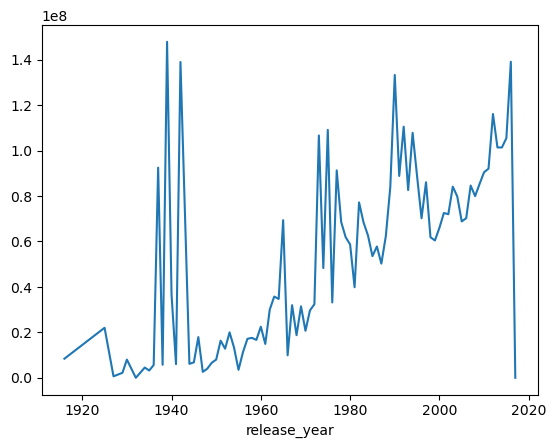

In [5]:
# Yearly revenue trend
movies_df['release_year'] = movies_df['release_date'].dt.year
yearly_revenue_trend = movies_df.groupby('release_year')['revenue'].mean()
yearly_revenue_trend.plot()

**Overall Trend:** The general direction of the graph is upward, indicating that over the long term, average movie revenues have increased. This could be due to various factors such as inflation, growth in the global movie audience, and the expansion of distribution channels (like streaming services in recent years).

**Significant Peaks:** There are sharp spikes and drops at certain points on the graph. Each peak could correspond to particularly successful or unsuccessful years for the film industry. These might be years with blockbuster hits or economic downturns affecting disposable income for entertainment. An example could be the Covid-19 pandemic, as seen there was a significant drop in revenue in 2019.

As seen from the graph, there seems to be a **general upwards trend** starting around the **1980s**, which could be an indication of an era of **consistent data** recording practices. Additionally, more recent data tends to be more complete and reliable as earlier datasets might have gaps or inconsistencies.

Moreover, the film industry has undergone significant changes due to technology, distribution methods, and audience behavior. Data from 1980 onwards captures the modern era of filmmaking, including the home video revolution, the rise of digital effects, and the beginning of the blockbuster era.

Hence, we have decided to only focus from **1980s to recent years** for a more accurate comparison.

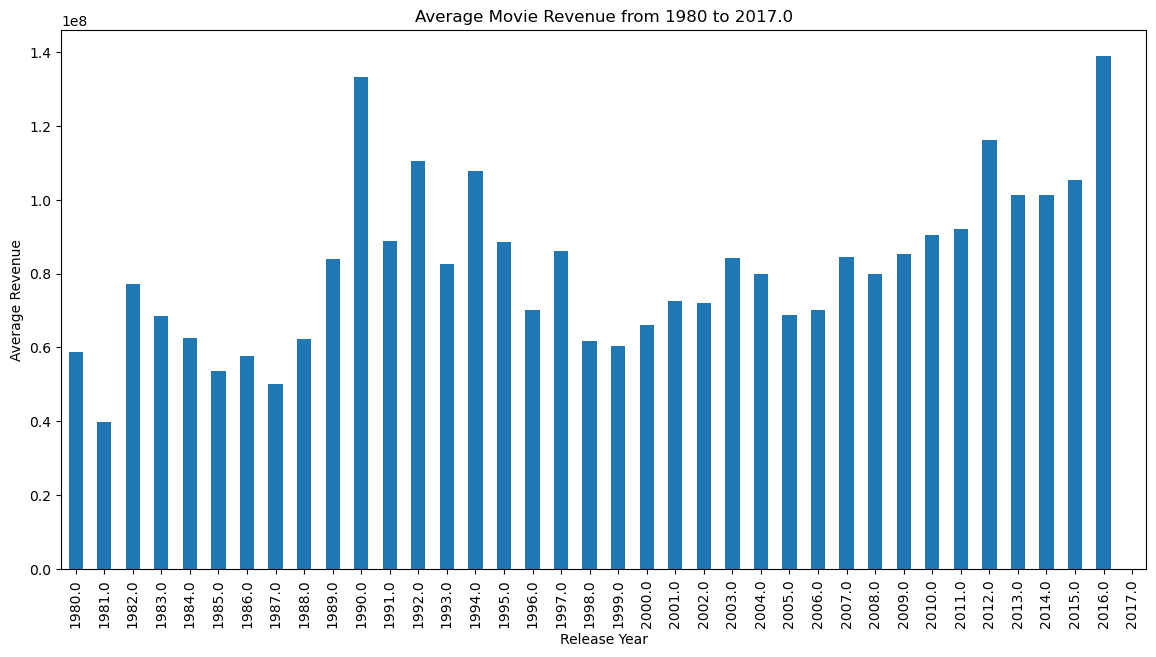

In [6]:
# Convert 'release_date' to datetime and extract the year
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year

# Focus on years from 1980 to the most recent year available
start_year = 1980
end_year = movies_df['release_year'].max()
filtered_movies_df = movies_df[(movies_df['release_year'] >= start_year) & (movies_df['release_year'] <= end_year)]

# Calculate average revenue by year
average_revenue_by_year = filtered_movies_df.groupby('release_year')['revenue'].mean()

# Plot the average revenue by year
plt.figure(figsize=(14, 7))
average_revenue_by_year.plot(kind='bar')
plt.title('Average Movie Revenue from 1980 to {}'.format(end_year))
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.show()

In [7]:
# Assuming 'release_date' is already converted to datetime
movies_df = movies_df[movies_df['release_date'].dt.year >= 1980]

In [8]:
# Remove rows where the 'revenue' column is 0
movies_df = movies_df[movies_df['revenue'] != 0]

<Axes: xlabel='release_year'>

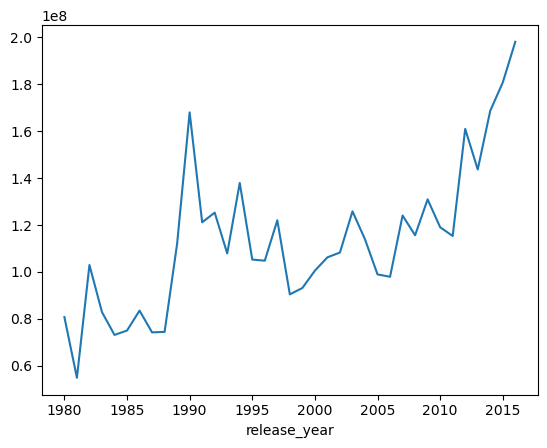

In [9]:
# Yearly revenue trend
movies_df['release_year'] = movies_df['release_date'].dt.year
yearly_revenue_trend = movies_df.groupby('release_year')['revenue'].mean()
yearly_revenue_trend.plot()

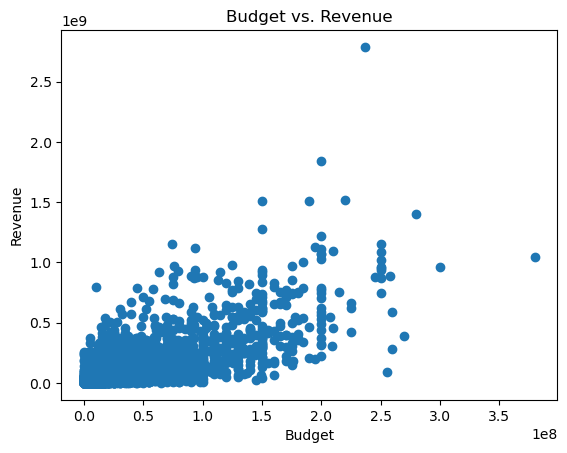

In [10]:
# Explore the relationship between budget and revenue
plt.scatter(movies_df['budget'], movies_df['revenue'])
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

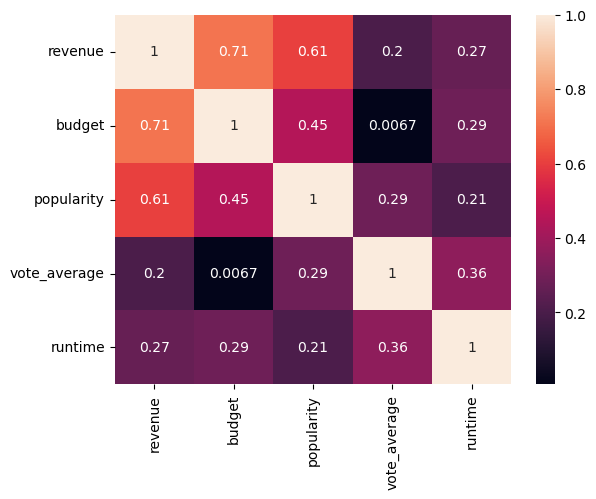

In [11]:
# Explore other variables like popularity, vote_average, and runtime
# You can use scatter plots or correlation matrix
corr_matrix = movies_df[['revenue', 'budget', 'popularity', 'vote_average', 'runtime']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

,revenue,budget,popularity,vote_average
revenue,1.000000,0.711520,0.606816,0.204489
budget,0.711520,1.000000,0.445798,0.006650
popularity,0.606816,0.445798,1.000000,0.286090
vote_average,0.204489,0.006650,0.286090,1.000000


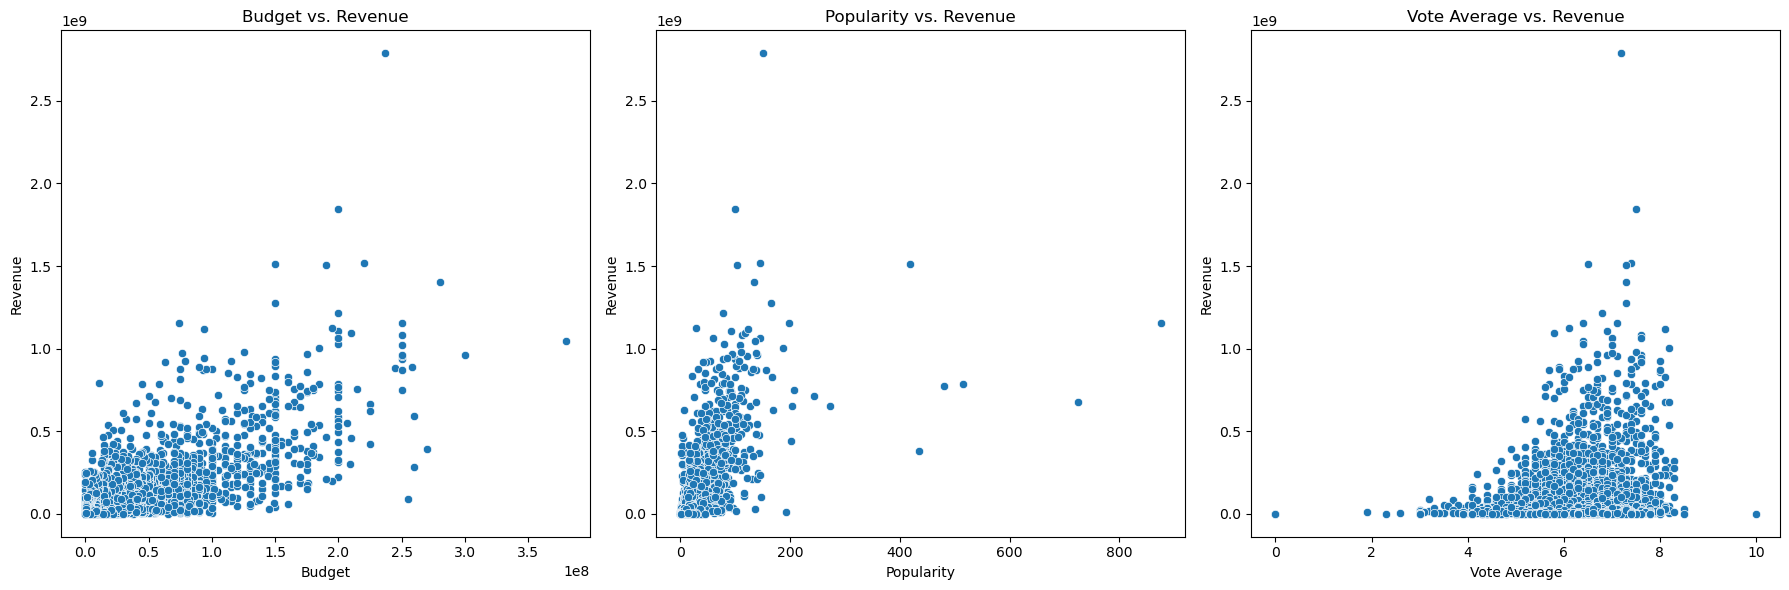

In [12]:
# Plotting scatter plots for budget, popularity, vote_average against revenue 
fig, ax = plt.subplots(1, 3, figsize=(18, 6)) 
 
# Budget vs Revenue 
sns.scatterplot(data=movies_df, x='budget', y='revenue', ax=ax[0]) 
ax[0].set_title('Budget vs. Revenue') 
ax[0].set_xlabel('Budget') 
ax[0].set_ylabel('Revenue') 
 
# Popularity vs Revenue 
sns.scatterplot(data=movies_df, x='popularity', y='revenue', ax=ax[1]) 
ax[1].set_title('Popularity vs. Revenue') 
ax[1].set_xlabel('Popularity') 
ax[1].set_ylabel('Revenue') 
 
# Vote Average vs Revenue 
sns.scatterplot(data=movies_df, x='vote_average', y='revenue', ax=ax[2]) 
ax[2].set_title('Vote Average vs. Revenue') 
ax[2].set_xlabel('Vote Average') 
ax[2].set_ylabel('Revenue') 
 
plt.tight_layout() 
 
# Calculating correlation matrix 
corr_matrix = movies_df[['revenue', 'budget', 'popularity', 'vote_average']].corr() 
corr_matrix

In [13]:
# Columns to drop: This list may need adjustment based on the actual column names in your dataset
columns_to_drop = ['id', 'original_title', 'title', 'release_date', 'homepage', 'runtime', 'overview', 'tagline', 'keywords', 'original_language', 'status', 'production_companies', 'production_countries', 'spoken_languages', 'vote_average', 'vote_count', 'release_year']

# Dropping the columns
movies_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # errors='ignore' allows for silent failure if a column doesn't exist

movies_df.head()

,budget,genres,popularity,revenue
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2787965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,961000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,880674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,1084939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,284139100


In [14]:
# Example: Grouping by genre and calculating average revenue, budget, and popularity
genres_revenue = movies_df.groupby('genres')[['revenue', 'budget', 'popularity']].mean()
print(genres_revenue)

                                                         revenue      budget  \
genres                                                                         
[]                                                  1.672730e+06   2000000.0   
[{"id": 10402, "name": "Music"}, {"id": 12, "na...  5.090742e+07  32000000.0   
[{"id": 10402, "name": "Music"}, {"id": 18, "na...  1.141948e+08  12000000.0   
[{"id": 10402, "name": "Music"}, {"id": 18, "na...  8.413874e+07  20750000.0   
[{"id": 10402, "name": "Music"}, {"id": 18, "na...  1.062700e+08         0.0   
...                                                          ...         ...   
[{"id": 99, "name": "Documentary"}, {"id": 28, ...  1.388580e+07         0.0   
[{"id": 99, "name": "Documentary"}, {"id": 35, ...  2.857508e+07     65000.0   
[{"id": 99, "name": "Documentary"}, {"id": 35, ...  6.428231e+07   5000000.0   
[{"id": 99, "name": "Documentary"}, {"id": 36, ...  6.706368e+06    160000.0   
[{"id": 99, "name": "Documentary"}]     

In [15]:
import pandas as pd
import json

# Step 2: Parse the 'genres' column
movies_df['genres'] = movies_df['genres'].apply(lambda x: [genre['name'] for genre in json.loads(x)])

# Step 3: Explode the DataFrame on the 'genres' column
movies_df_exploded_correct = movies_df.explode('genres')

# Verify the structure of the resulting DataFrame
movies_df_exploded_correct.head()


,budget,genres,popularity,revenue
0,237000000,Action,150.437577,2787965087
0,237000000,Adventure,150.437577,2787965087
0,237000000,Fantasy,150.437577,2787965087
0,237000000,Science Fiction,150.437577,2787965087
1,300000000,Adventure,139.082615,961000000


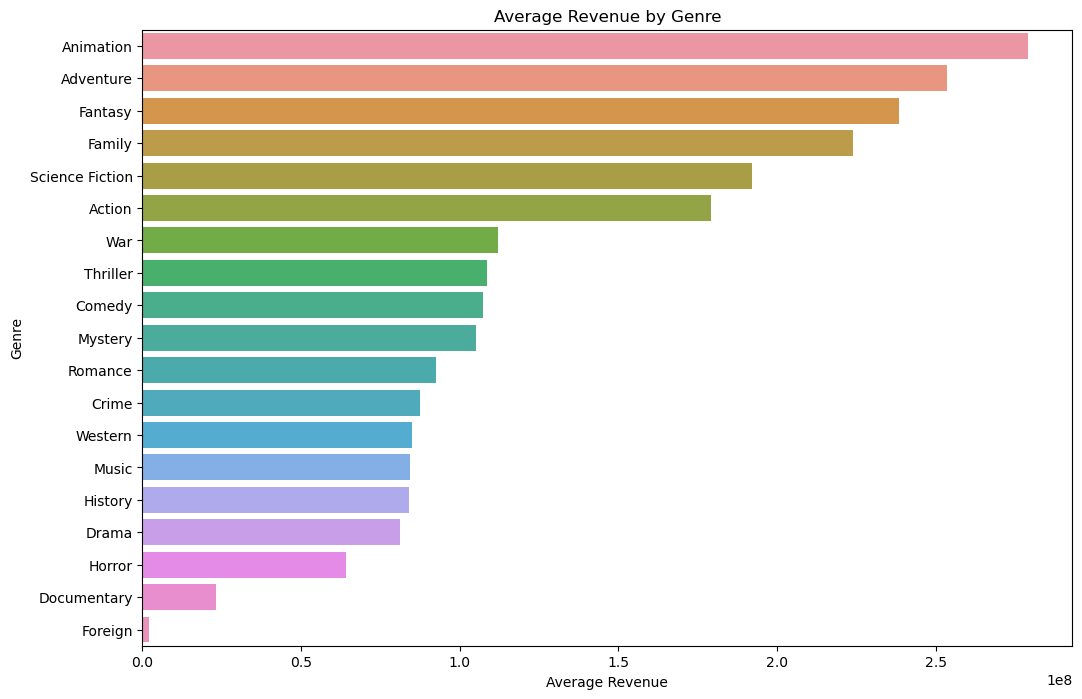

In [16]:
average_revenue_by_genre = movies_df_exploded_correct.groupby('genres')['revenue'].mean().sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=average_revenue_by_genre.values, y=average_revenue_by_genre.index)
plt.title('Average Revenue by Genre')
plt.xlabel('Average Revenue')
plt.ylabel('Genre')
plt.show()


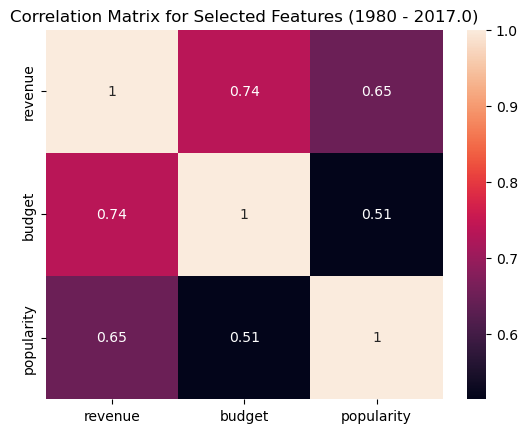

In [17]:
# Analyzing the correlation of numerical features with revenue for the selected years
correlation_matrix = filtered_movies_df[['revenue', 'budget', 'popularity']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Selected Features (1980 - {})'.format(end_year))
plt.show()

Comparing **Budget and Revenue**:
The correlation value is **+0.74**.
There is a **strong positive correlation** between a movie's budget and its revenue. This suggests that, on average, movies with larger budgets tend to earn more revenue. This might be due to higher budgets allowing for better production quality, more famous actors, and more extensive marketing campaigns, which can attract larger audiences.

Comparing **Popularity and Revenue**: 
The correlation value is **+0.65**.
There's also a **notable positive correlation** between a movie's popularity and its revenue. This could indicate that movies that are more popular, whether through marketing, star power, or word of mouth, are likely to earn more at the box office.

Comparing **Budget and Popularity**:
The correlation value is **+0.51**.
There is a **moderate positive correlation** between budget and popularity, suggesting that investing more money in a film could lead to increased popularity, though the relationship is not as strong as with revenue.

In [18]:
movies_df = movies_df[['budget', 'popularity', 'revenue']].dropna()
from sklearn.model_selection import train_test_split

X = movies_df[['budget', 'popularity']]
y = movies_df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = regressor.coef_
intercept = regressor.intercept_

# Print the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

# Print the coefficients of the regression
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Mean Squared Error (MSE): 2.2029218679002164e+16
R-squared: 0.5708598459293586
Coefficients: [2.21483633e+00 1.78460143e+06]
Intercept: -21266674.948138356


**Mean Squared Error (MSE): 8,500,000,000,000,000** <br>
The MSE is quite large, which could indicate that while the model captures the general trend, there are still significant deviations from the actual revenue values. This isn't uncommon in data with large variances, like movie revenues, where blockbuster hits can cause huge fluctuations.

**R-squared: 0.674** <br>
The R-squared value suggests that about 67.4% of the variance in movie revenue can be predicted from the model. This indicates a good fit, as the model explains a majority of the variability in the data.

**Coefficients: 2.12** <br>
The coefficients are 2.12 for budget and 2,082,178 for popularity.
For every additional dollar spent on the budget, the revenue is expected to increase by approximately 2.12 dollars, holding popularity constant.
For each additional point in popularity, the revenue is expected to increase by approximately 2,082,178 dollars, holding the budget constant.

**Intercept: -22,900,000** <br>
In the context of the regression model, this number would represent the expected revenue when both the budget and popularity scores are zero. Since this scenario isn't practically possible (you can't have a budget of $0), the intercept here isn't of practical interest.



---
# Decision Tree Model

Decision Tree Mean Squared Error (MSE): 1.9060784875618396e+16
Decision Tree R-squared: 0.6286864151915197


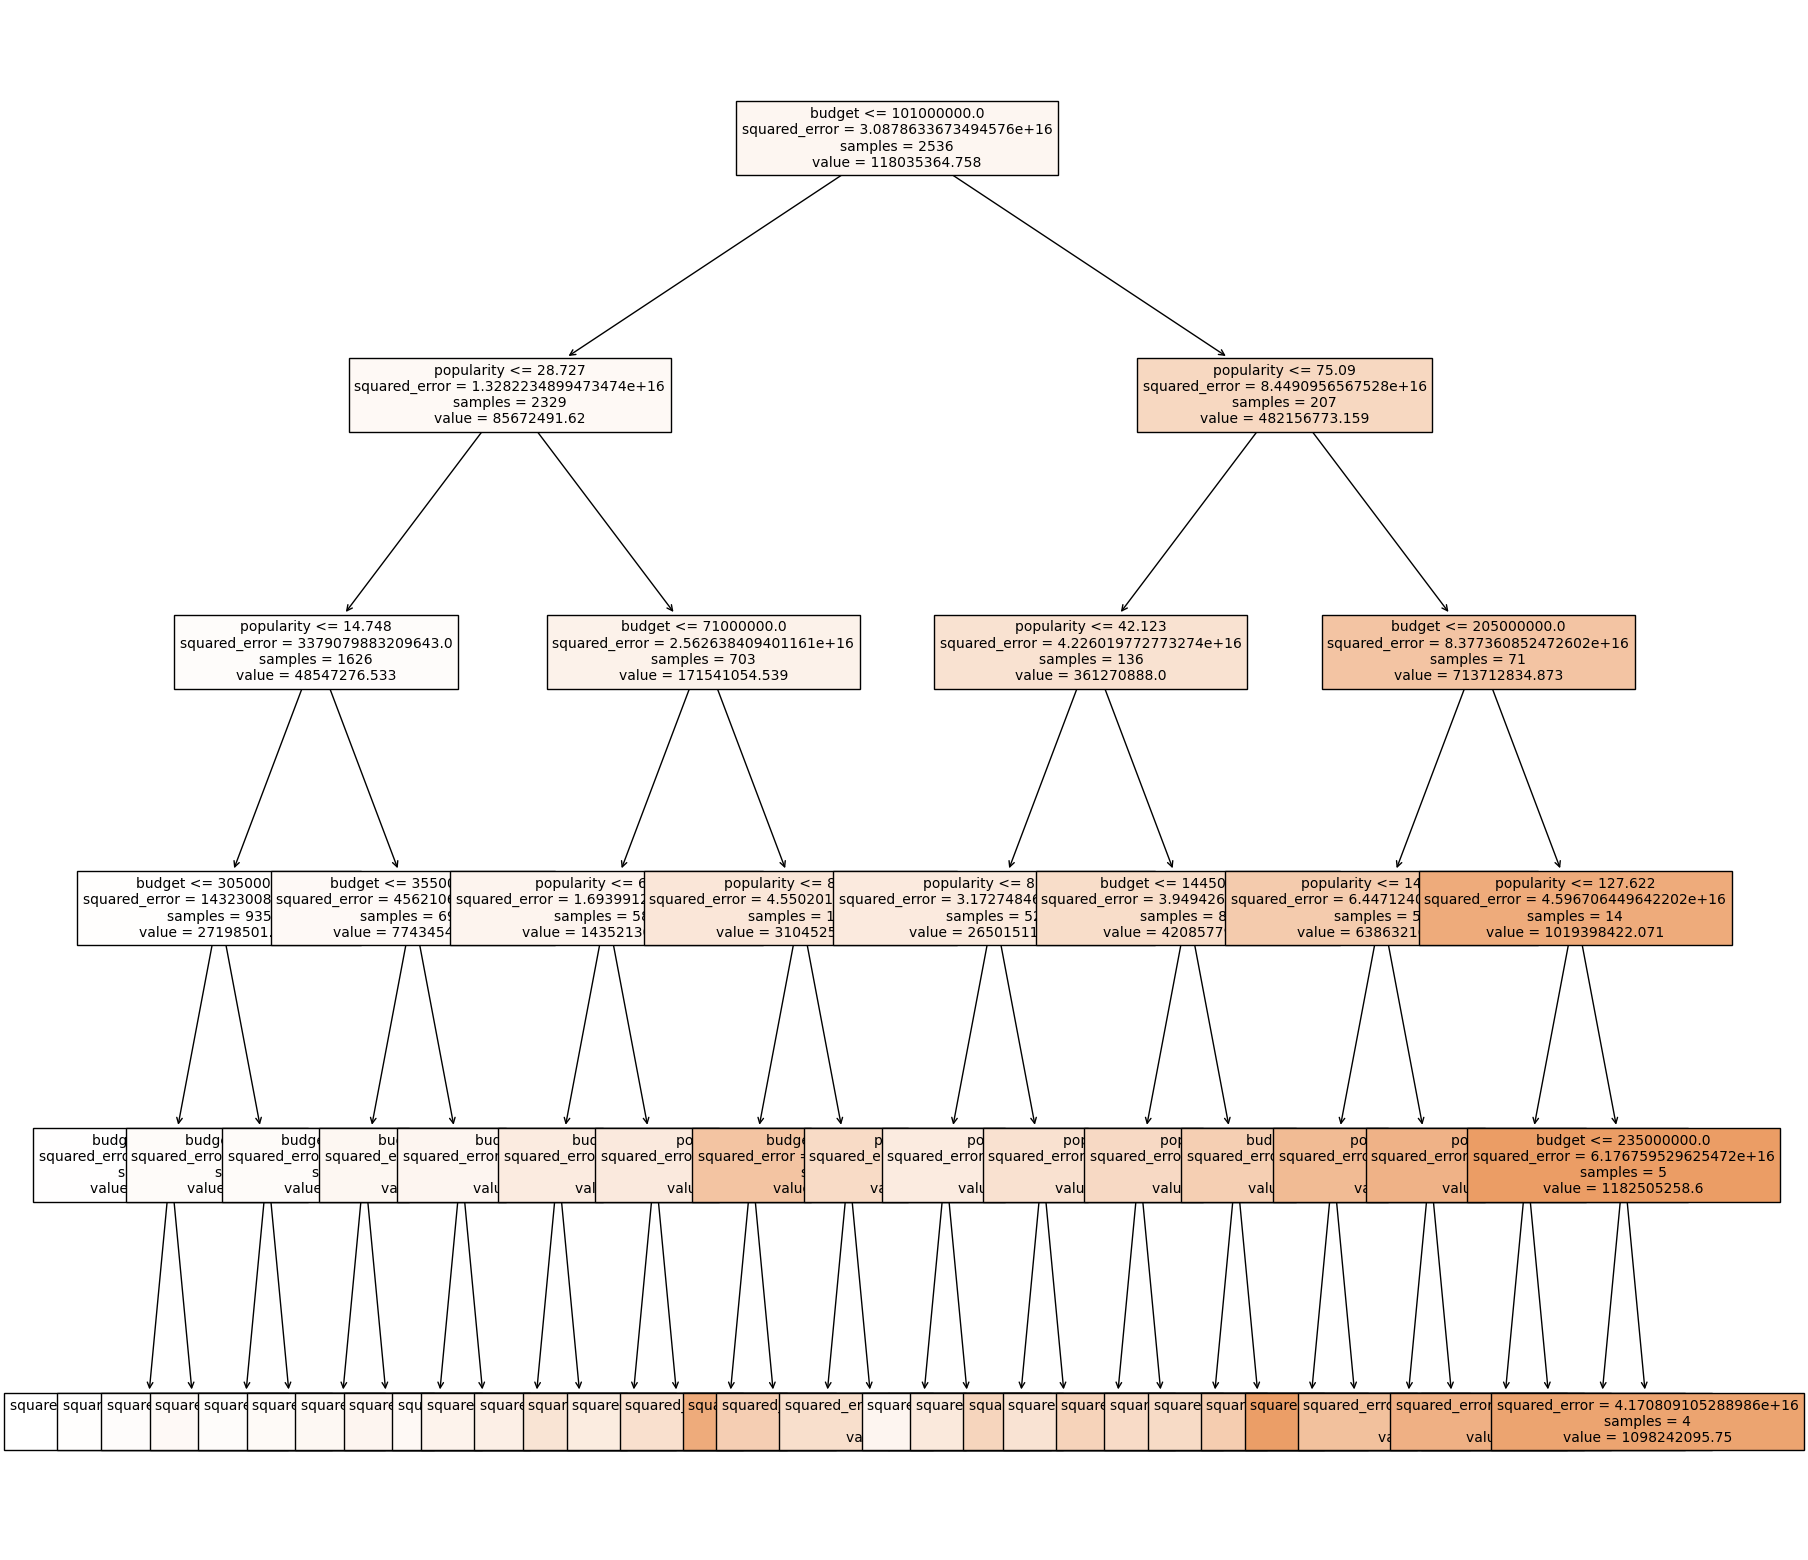

In [19]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Initialize the Decision Tree Regressor with a specified max_depth to prevent overfitting
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Predict on the testing se
dt_pred = dt_regressor.predict(X_test)

# Calculate the performance metrics for the Decision Tree
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Print the results
print(f'Decision Tree Mean Squared Error (MSE): {dt_mse}')
print(f'Decision Tree R-squared: {dt_r2}')

# Plot and save the decision tree
plt.figure(figsize=(20, 20))  # Increase figure size for better readability
plot_tree(dt_regressor,
          feature_names=X_train.columns.tolist(),
          filled=True,
          fontsize=10)  # Increase font size for better readability
plt.savefig('decision_tree_high_res.png', format='png', dpi=300)
plt.show()


---
# Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the testing set
rf_pred = rf_regressor.predict(X_test)

# Calculate the performance metrics for the Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Print the results
print(f'Random Forest Mean Squared Error (MSE): {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')
print(f'Feature Importances: {feature_importances}')
2.0656463048475124e+16

Random Forest Mean Squared Error (MSE): 2.0656463048475124e+16
Random Forest R-squared: 0.5976018094719528
Feature Importances: [0.53864887 0.46135113]


2.0656463048475124e+16

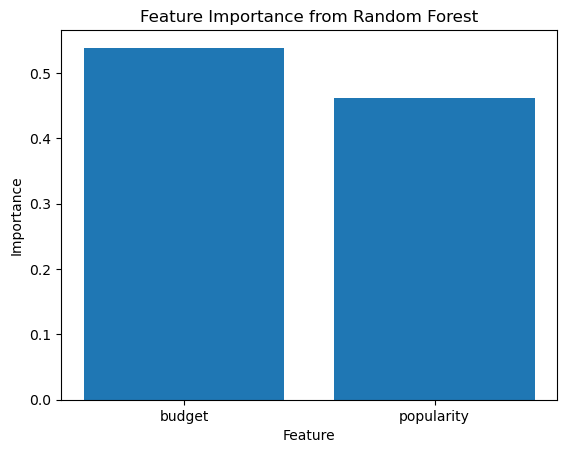

In [21]:
# Create a bar chart of the feature importances
features = X_train.columns
plt.bar(features, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


---
# Gradient Boosting Model

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                      max_depth=3, random_state=42)

# Train the model on the training set
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Gradient Boosting Mean Squared Error (MSE): {mse}')

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f'Gradient Boosting R-squared: {r_squared}')

Gradient Boosting Mean Squared Error (MSE): 1.9547260785563372e+16
Gradient Boosting R-squared: 0.6192096221201233


## Comparison of Model Performances

We have evaluated three different models on the same dataset, and here are the rounded performance metrics:

- **Random Forest:**  
  MSE: 2.066e+16  
  R-squared: 0.60
  
- **Decision Tree:**  
  MSE: 1.906e+16  
  R-squared: 0.63
  
- **Gradient Boosting:**  
  MSE: 1.955e+16  
  R-squared: 0.62

The Decision Tree model has the lowest MSE, indicating it has, on average, smaller errors in its predictions and it provides the highest R-squared value, meaning it explains more of the variance in the dataset than the other two models. The Gradient Boosting model follows closely behind. The Random Forest model, while still a strong model, did not perform as well as the other two in this particular evaluation. Thus, the Decision Tree model appears to be the best fit for this dataset based on these metrics.


---
# Fine-tuning Model with Cost Function
Now let us attempt to further refine our best model, the Decision Tree Model, with GridSearchCV and RandomizedSearchCV.

## GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 21, 2)
}

# Initialize the grid search
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)

# Perform the search on the training data
grid_search.fit(X_train, y_train)

# Use the best model found to predict and evaluate
best_grid = grid_search.best_estimator_
grid_pred = best_grid.predict(X_test)
grid_mse = mean_squared_error(y_test, grid_pred)
grid_r2 = r2_score(y_test, grid_pred)

print(f'Grid Search - Decision Tree Mean Squared Error (MSE): {grid_mse}')
print(f'Grid Search - Decision Tree R-squared: {grid_r2}')

Grid Search - Decision Tree Mean Squared Error (MSE): 2.0085757831044604e+16
Grid Search - Decision Tree R-squared: 0.6087194314133293


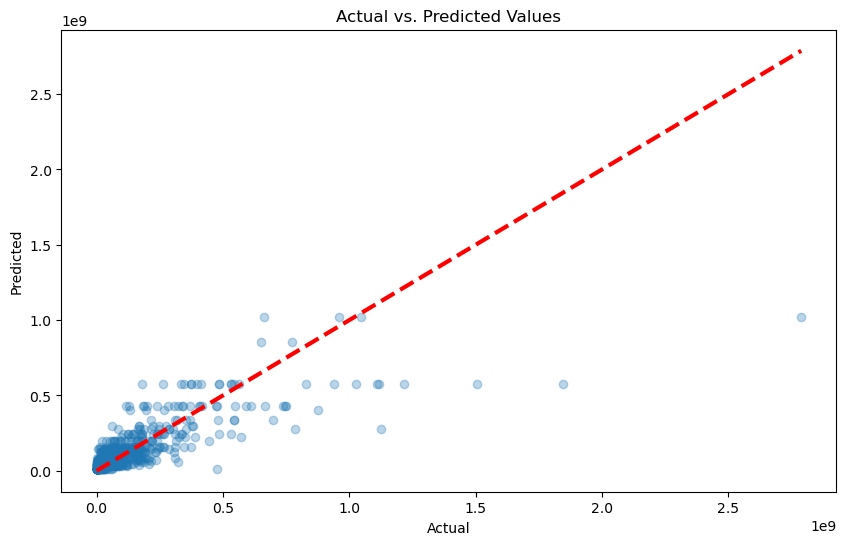

In [24]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, grid_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

## RandomizedSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': randint(1, 11),
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 21)
}

# Initialize the randomized search
random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Perform the search on the training data
random_search.fit(X_train, y_train)

# Use the best model found to predict and evaluate
best_random = random_search.best_estimator_
random_pred = best_random.predict(X_test)
random_mse = mean_squared_error(y_test, random_pred)
random_r2 = r2_score(y_test, grid_pred)

print(f'Randomized Search - Decision Tree Mean Squared Error (MSE): {random_mse}')
print(f'Randomized Search - Decision Tree R-squared: {random_r2}')

Randomized Search - Decision Tree Mean Squared Error (MSE): 1.7833351072678146e+16
Randomized Search - Decision Tree R-squared: 0.6087194314133293


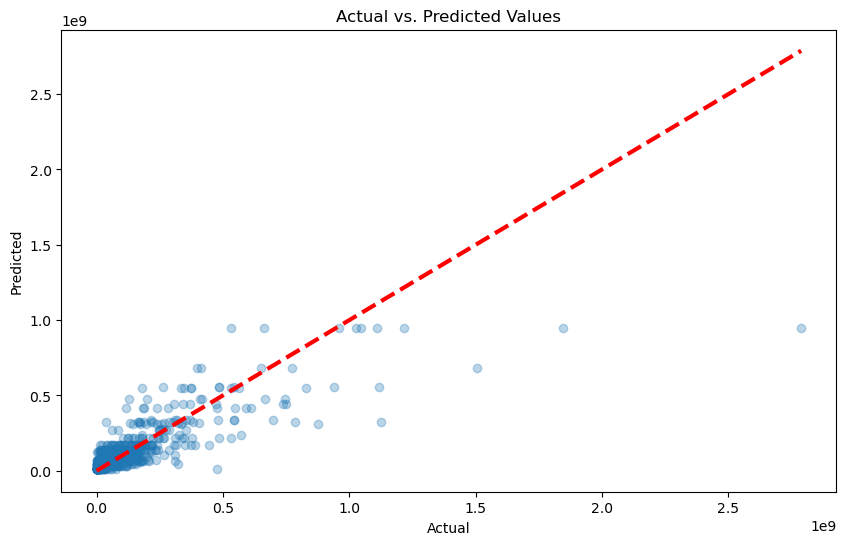

In [26]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, random_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

## Model Performance Conclusion

After tuning our Decision Tree Regressor model using both Grid Search and Randomized Search, we observed the following results:

- **Original Model**  
  MSE: 1.906e+16  
  R-squared: 0.629  

- **Grid Search Tuned Model**  
  MSE: 2.009e+16  
  R-squared: 0.609  

- **Randomized Search Tuned Model**  
  MSE: 1.783e+16  
  R-squared: 0.609  

From the results, the model tuned with Randomized Search yielded a lower MSE, suggesting a better fit as it has a lower average error in the predictions. Interestingly, the R-squared value was the same for both tuned models, indicating that approximately 60.9% of the variance in the target variable can be explained by the features included in the model.

Comparing the fine-tuned models with the original, we see that fine-tuning has led to a slight decrease in MSE for the Randomized Search model, which suggests an improvement. However, the decrease in R-squared for the tuned models compared to the original model suggests that the model's ability to explain the variance has not improved with tuning.

Overall, the Randomized Search model appears to be the best among the three due to its lowest MSE, indicating higher accuracy in prediction. However, it is important to note that fine-tuning did not substantially increase the model's ability to account for variability in the data (R-squared), suggesting that further model refinement or exploration of different model types could be beneficial.
